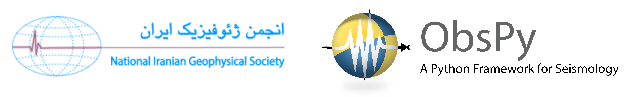
<h1><center>Iman Kahbasi</center></h1>
<h1><center>PhD student at IIEES</center></h1>
<h1><center>1400-12-09</center></h1>

# list of Client

In [ ]:
from obspy.clients.fdsn.header import URL_MAPPINGS

for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

# FDSN (get data)

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")


t = UTCDateTime("2010-02-27T06:45:00.000")
st = client.get_waveforms("IU", "ANMO", "00", "LHZ", t, t + 60 * 60)
st.plot()  

# FDSN (get inventory)

In [ ]:
from obspy import UTCDateTime as utc

client = Client("IRIS")
stime = utc("2002-01-01")
etime = utc("2002-01-02")
inventory = client.get_stations(network="IU",
                                station="A*",
                                starttime=stime,
                                endtime=etime)
inventory.plot()
print(inventory)

In [ ]:
from obspy import UTCDateTime as utc

client = Client("IRIS")
stime = utc("2022-01-01")
etime = utc()
inventory = client.get_stations(network="*",
                                station="**",
                                starttime=stime,
                                endtime=etime)

print(inventory)

# FDSN (get catalog)

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")
stime = UTCDateTime("2002-01-01")
etime = UTCDateTime("2002-01-02")

cat = client.get_events(starttime=stime,
                        endtime=etime,
                        minmagnitude=6,
                        catalog="ISC")
cat.plot()
print(cat)  

# Seedlink

In [ ]:
from obspy.clients.seedlink.easyseedlink import EasySeedLinkClient

# Subclass the client class
class MyClient(EasySeedLinkClient):
    # Implement the on_data callback
    def on_data(self, trace):
        print('Received trace:')
        print(trace)

# Connect to a SeedLink server
client = MyClient('geofon.gfz-potsdam.de:18000')

# Retrieve INFO:STREAMSb
streams_xml = client.get_info('STREAMS')
print(streams_xml)

# Select a stream and start receiving data
client.select_stream('BW', 'RJOB', 'EHZ')
client.run()

# Syntetic

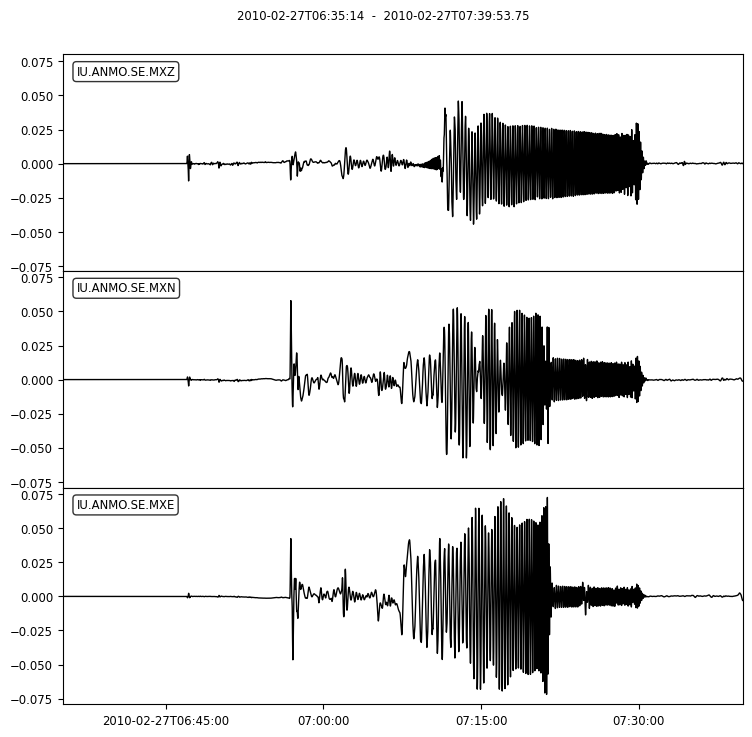

3 Trace(s) in Stream:
IU.ANMO.SE.MXZ | 2010-02-27T06:35:14.000000Z - 2010-02-27T07:39:53.750000Z | 4.0 Hz, 15520 samples
IU.ANMO.SE.MXN | 2010-02-27T06:35:14.000000Z - 2010-02-27T07:39:53.750000Z | 4.0 Hz, 15520 samples
IU.ANMO.SE.MXE | 2010-02-27T06:35:14.000000Z - 2010-02-27T07:39:53.750000Z | 4.0 Hz, 15520 samples


In [1]:
from obspy.clients.syngine import Client

client = Client()
st = client.get_waveforms(model="ak135f_5s", network="IU", station="ANMO",
                          eventid="GCMT:C201002270634A")
st.plot()
print(st)  

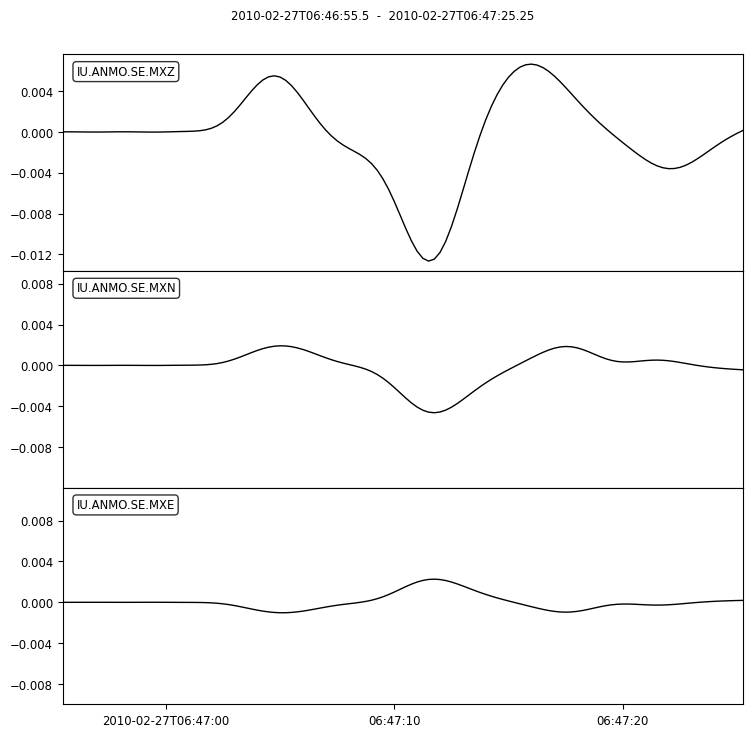

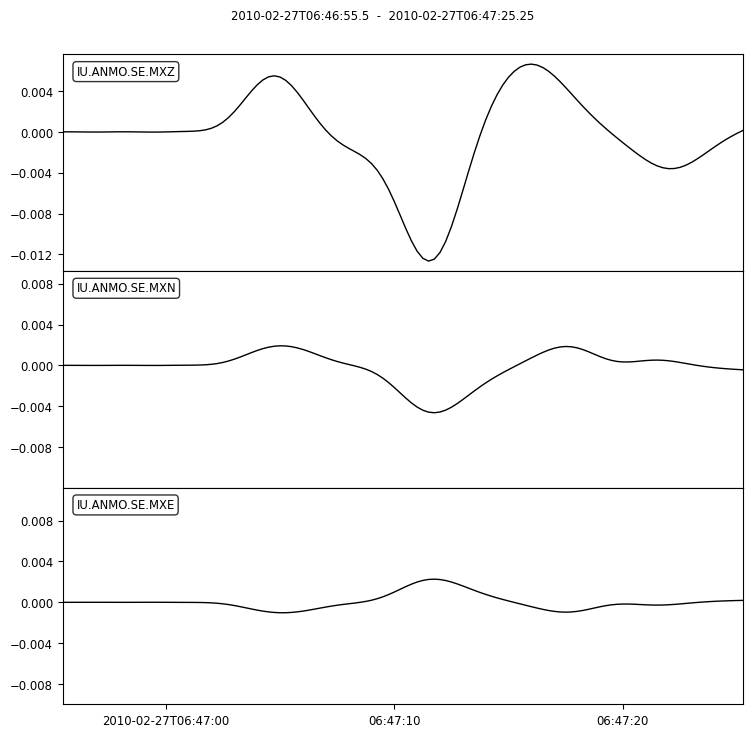

In [2]:
st = client.get_waveforms(model="ak135f_5s", network="IU", station="AN*",
                          eventid="GCMT:C201002270634A",
                          starttime="P-10", endtime="P+20")

st.plot()  